# Réduction de dimensions et Visualisation des données

En premier lieu, pour un souci d'un meilleur environnement de travail collaboratif, on a opté d'utiliser google.colab pour pouvoir exporter les fichiers, en important le package google.colab .


---


Exportation du fichier "`villes.csv`" au google drive .

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Lecture du fichier "`villes.csv`"  à l'aide de la méthode read_csv qui retourn un objet de type Dataframe. 
Puis on selectionne seulement les valeurs des 12 colonnes et on le stocke dans un numpy array car scklearn manipule principalement des arrays.

In [60]:
# Lecture du fichier "villes.csv"
import numpy as np
np.set_printoptions(threshold=np.nan,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

data = pd.read_csv("villes.csv", sep=';')
X = data.ix[:, 1:13].values
labels = data.ix[:, 0].values
print(X)



[[ 7.7  8.7 10.5 12.6 15.9 19.8 22.  22.2 20.3 16.3 11.8  8.7]
 [ 4.2  4.9  7.9 10.4 13.6 17.  18.7 18.4 16.1 11.7  7.6  4.9]
 [ 4.6  5.4  8.9 11.3 14.5 17.2 19.5 19.4 16.9 12.5  8.1  5.3]
 [ 1.1  2.2  6.4  9.7 13.6 16.9 18.7 18.3 15.5 10.4  5.7  2. ]
 [ 7.6  8.  10.8 12.  14.7 17.8 19.7 19.9 18.5 14.8 10.9  8.2]
 [ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.3  2.6  6.9 10.4 14.3 17.7 19.6 19.  15.9 10.5  5.7  2.1]
 [ 0.5  1.6  5.7  9.  13.  16.4 18.9 18.3 15.3 10.1  4.6  0.5]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 3.1  3.9  7.4  9.9 13.3 16.8 18.4 17.8 15.3 10.7  6.7  3.8]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.

On importe la classe StandardScaler afin de normaliser les différentes valeurs qu'on dans les 12 colonnes. 
La méthode fit() permet de déterminner la moyenne et l'écart-type pour les colonnes de ce DataSet.
La méthode transform() nous permet d'appliquer cette normalisation à notre matrice de données.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
print("-------------------------------------------------------")
StandardScaler(copy=True, with_mean=True, with_std=True)

print(scaler.mean_)
Xnorm=scaler.transform(X)

print("-------------------------------------------------------")
from sklearn.decomposition import PCA

#Transformation de la matrice de données en 12 composantes qui sont des combinaison linéaires des 12 colonnes initiales.

pca = PCA(n_components=12)
pca.fit(Xnorm)
Xpca=pca.transform(Xnorm)
print("valeurs propres par ordre décroissant")
print(pca.explained_variance_ratio_)

-------------------------------------------------------
[ 3.93125   4.790625  8.125    10.875    14.35     17.73125  19.753125
 19.453125 16.903125 12.26875   7.871875  4.784375]
-------------------------------------------------------
valeurs propres par ordre décroissant
[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]


2. Il faut garder les deux premiers variables car d'après le résultat obtenu à la question précédente les deux premières variables représentent 98.98 % des données.

In [64]:
# Affichage des composentes des deux variables retenues 
print("les composentes de y1")
print(pca.components_[0])
print("--------------------------------------------------------------------------")
print("les composentes de y2")
print(pca.components_[1])


les composentes de y1
[0.27151028 0.28846164 0.3010811  0.30354174 0.28353089 0.27841907
 0.27290295 0.28757774 0.30472022 0.3038548  0.29242808 0.2729549 ]
--------------------------------------------------------------------------
les composentes de y2
[ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
 -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]



En affichant les composantes des deux premiers axes principaux grâce à l'attribut `components_`, on peut remarquer qu'on a des pondérations très similaires pour le premier axe et une variation plus élevée pour le deuxième axe. Sachant qu'on pris en considération seulement les pondération dont la valeur absolue supérieur à 1/12.

Dans notre cas, le premier axe on a des pondérations similaires donc la valeur finale est proche à la moyenne. 

Le deuxième axe, on peut remarquer qu'on a des valeurs positives pendant l'été et négatives pendant l'hiver avec des valeurs plus variées.

Visualisation graphique des villes projetées dans le plan principal.

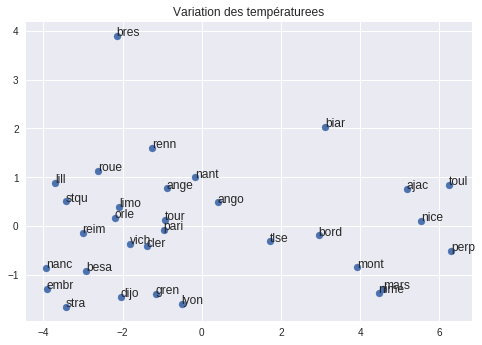

In [42]:
import matplotlib
plt.scatter(Xpca[:, 0], Xpca[:, 1])
for label, x, y in zip(labels, Xpca[:, 0], Xpca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title('Variation des températurees')
plt.show()

Comme dit précédemment, l'axe horizontale représente la moyenne des températures sur l'année.Autrement dit, plus les villes se trouvent à droite plus leurs températures moyennes augmentent et vice-versa.

L'axe verticale représente la variation des températures sur l'année, plus les villes se trouvent en bas du shéma plus leurs températures en hiver sont minimales(leurs valeurs absolues est maximales), en haut du shéma on trouve de villes avec des température en été très élevés.

Notre schéma permet ainsi de montrer la similarité en température des différentes villes. Plus les villes se rapprochent dans notres schéma 'exemple : lyon, gren , dijo ) plus leurs températures changement de manière similaires tout en long de l'année et vice-versa



---



Avec le fichier "crimes.csv"

In [43]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving crimes.csv to crimes (1).csv
User uploaded file "crimes.csv" with length 2547 bytes


In [64]:
# Lecture du fichier "crimes.csv"

import numpy as np
np.set_printoptions(threshold=np.nan,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

data = pd.read_csv("crimes.csv", sep=';')
#Dans ce cas on seulement besoin de 7 colonnes
X_c = data.ix[:, 1:8].values
labels = data.ix[:, 0].values
print(X_c)


[[  14.2   25.2   96.8  278.3 1135.5 1881.9  280.7]
 [  10.8   51.6   96.8  284.  1331.7 3369.8  753.3]
 [   9.5   34.2  138.2  312.3 2346.1 4467.4  439.5]
 [   8.8   27.6   83.2  203.4  972.6 1862.1  183.4]
 [  11.5   49.4  287.   358.  2139.4 3499.8  663.5]
 [   6.3   42.   170.7  292.9 1935.2 3903.2  477.1]
 [   4.2   16.8  129.5  131.8 1346.  2620.7  593.2]
 [   6.    24.9  157.   194.2 1682.6 3678.4  467. ]
 [  10.2   39.6  187.9  449.1 1859.9 3840.5  351.4]
 [  11.7   31.1  140.5  256.5 1351.1 2170.2  297.9]
 [   7.2   25.5  128.    64.1 1911.5 3920.4  489.4]
 [   5.5   19.4   39.6  172.5 1050.8 2599.6  237.6]
 [   9.9   21.8  211.3  209.  1085.  2828.5  528.6]
 [   7.4   26.5  123.2  153.5 1086.2 2498.7  377.4]
 [   2.3   10.6   41.2   89.8  812.5 2685.1  219.9]
 [   6.6   22.   100.7  180.5 1270.4 2739.3  244.3]
 [  10.1   19.1   81.1  123.3  872.2 1662.1  245.4]
 [  15.5   30.9  142.9  335.5 1165.5 2469.9  337.7]
 [   2.4   13.5   38.7  170.  1253.1 2350.7  246.9]
 [   8.    3

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_c)
print("-------------------------------------------------------")
StandardScaler(copy=True, with_mean=True, with_std=True)

print(scaler.mean_)
Xnorm_c=scaler.transform(X_c)

print("-------------------------------------------------------")
from sklearn.decomposition import PCA

#Transformation de la matrice de données en 7 composantes qui sont des combinaison linéaires des 12 colonnes initiales.

pca_c = PCA(n_components=7)
pca_c.fit(Xnorm_c)
Xpca_c=pca_c.transform(Xnorm_c)
print("valeurs propres par ordre décroissant")
print(pca_c.explained_variance_ratio_)


-------------------------------------------------------
[   7.444   25.734  124.092  211.3   1291.904 2671.288  377.526]
-------------------------------------------------------
valeurs propres par ordre décroissant
[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


In [65]:
print("les composentes de y1")
print(pca_c.components_[0])
print("--------------------------------------------------------------------------")
print("les composentes de y2")
print(pca_c.components_[1])


les composentes de y1
[0.30027916 0.43175936 0.39687549 0.3966517  0.44015721 0.35735953
 0.29517681]
--------------------------------------------------------------------------
les composentes de y2
[-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
  0.50242093]


En affichant les composantes des deux premiers axes principaux grâce à l'attribut `components_`, on peut remarquer qu'on a une variation des pondération élevées pour les deux premiers axes principaux. Sachant qu'on pris en considération seulement les pondération dont la valeur absolue supérieur à 1/7.

Pour la première composante, on a que des valeurs positives et rapprochés.Contrairement à la deuxième composante. 



Visualisation graphique des crimes projetées dans le plan principal.

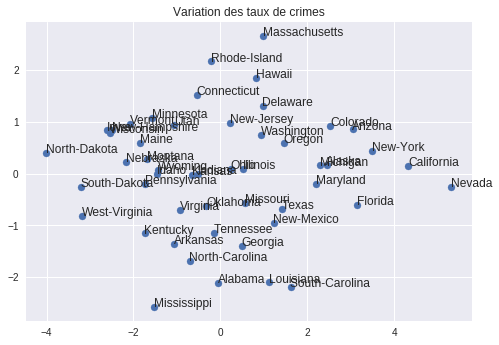

In [67]:
import matplotlib
plt.scatter(Xpca_c[:, 0], Xpca_c[:, 1])
for label, x, y in zip(labels, Xpca_c[:, 0], Xpca_c[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title('Variation des taux de crimes')
plt.show()

Notre schéma permet de montrer la similarité en taux de crimes des différentes villes. Plus les villes se rapprochent dans notres schéma, plus leurs taux de crimes changement de manière similaires tout en long de l'année et vice-versa.

L'axe horizontale représente ici, la tendance du taux de criminalité quelque soit leurs types.

L'axe verticale représente la différence des taux de crimes entres les types de crimes, qu'on a dans le DataSet.



# Clustering

In [37]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving villes.csv to villes (1).csv
User uploaded file "villes.csv" with length 1982 bytes


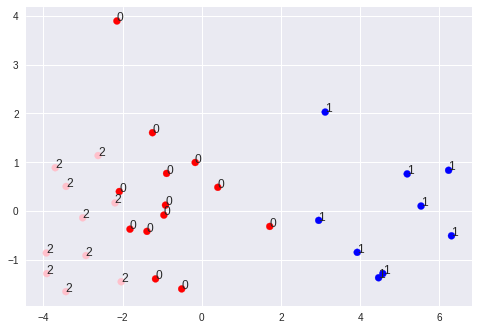

In [52]:
# Clustering pour les villes en utilisant Kmeans
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
# nombre de clusters
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(Xnorm)
# avoir les labels des clusters
labels = kmeans.predict(Xnorm)
colors = ['red','yellow','blue','pink']
plt.scatter(Xpca[:, 0], Xpca[:, 1], c= labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, Xpca[:, 0], Xpca[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

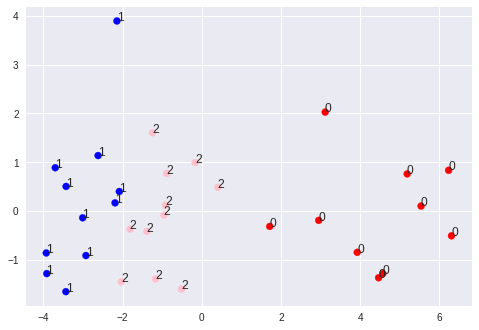

In [53]:
# Clustering pour les villes en utilisant AgglomerativeClustering avec la méthode d'agrégation ward
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3).fit(Xnorm)
labels = clustering.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(Xpca[:, 0], Xpca[:, 1], c= labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, Xpca[:, 0], Xpca[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Le clustering effectué indique une séparation des villes selon leus températures, les villes avec des températures annuelles variant de la même manière appartiennent à la même classe.

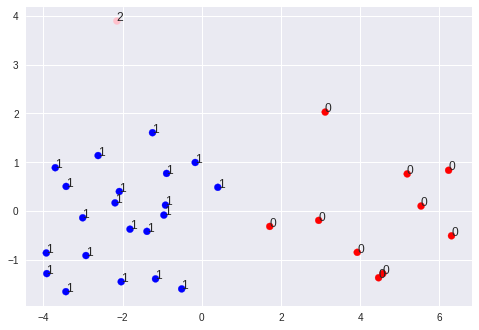

In [73]:
# Clustering pour les villes en utilisant AgglomerativeClustering avec la méthode d'agrégation average
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average', n_clusters=3).fit(Xpca)
labels = clustering.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(Xpca[:, 0], Xpca[:, 1], c= labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, Xpca[:, 0], Xpca[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [74]:
# Calcul de l'indice Silhouette pour les données ville.
from sklearn import metrics
for i in np.arange(2, 6):
  clustering = KMeans(n_clusters=i).fit_predict(Xnorm)
  print(metrics.silhouette_score(Xnorm, clustering,metric='euclidean'))
  print()

0.625557719180767

0.3897162972659349

0.39249385306689233

0.33297421400004423



La meilleur partition correspond à un nombre de cluster égale à 2, la valeur de l’indice Silhouette.diminue drastiqument en augmentant le nombre de clusters. Le cas optimal est celui où les villes sont divisées par leurs températures annuelles en deux classes séparées.

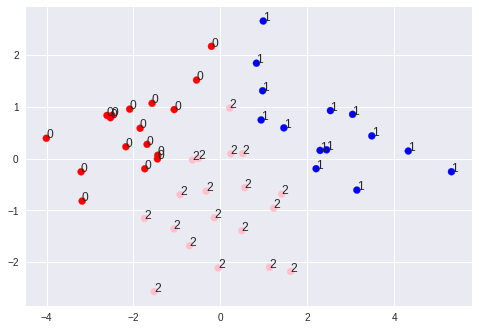

In [70]:
# Clustering pour les crimes en utilisant Kmeans
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
# nombre de clusters
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(Xnorm_c)
# avoir les labels des clusters
labels = kmeans.predict(Xnorm_c)
colors = ['red','yellow','blue','pink']
plt.scatter(Xpca_c[:, 0], Xpca_c[:, 1], c= labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, Xpca_c[:, 0], Xpca_c[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

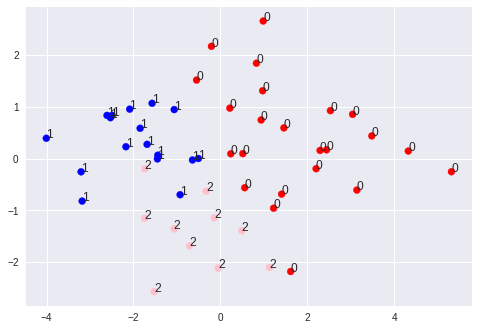

In [75]:
# Clustering pour les crimes en utilisant AgglomerativeClustering avec la méthode d'agrégation ward
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3).fit(Xnorm_c)
labels = clustering.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(Xpca_c[:, 0], Xpca_c[:, 1], c= labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, Xpca_c[:, 0], Xpca_c[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

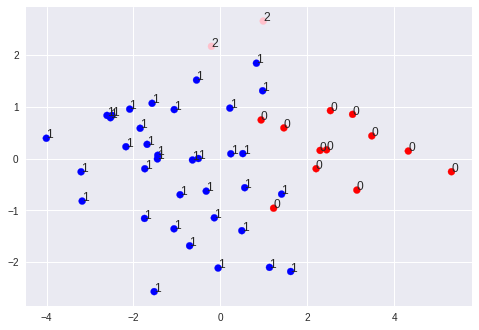

In [79]:
# Clustering pour les crimes en utilisant AgglomerativeClustering avec la méthode d'agrégation average
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average', n_clusters=3).fit(Xnorm_c)
labels = clustering.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(Xpca_c[:, 0], Xpca_c[:, 1], c= labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, Xpca_c[:, 0], Xpca_c[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Dans ce schéma, on a classé les 2 villes en haut vue que leurs variations de températures sont différentes des autres villes (la valeur absolue du des températures positifs est tres supérieur à la valeur absolue du min des températeurs négatives).

In [81]:
# Calcul de l'indice Silhouette pour les données ville.
from sklearn import metrics
for i in np.arange(2, 6):
  clustering = KMeans(n_clusters=i).fit_predict(Xnorm_c)
  print(metrics.silhouette_score(Xnorm_c, clustering,metric='euclidean'))
  print()

0.3206059508171855

0.25677174116114077

0.27826178619043007

0.2732564872220037




La meilleur partition correspond à un nombre de cluster égale à 2, la valeur de l’indice Silhouette.diminue en augmentant le nombre de clusters.